In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_model import SimpleNN
from mfbox import gokunet_alpha3s


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# load input data
x_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_input.txt")
# normalize input data
bounds = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")
# x_test = (x_test - bounds[:,0]) / (bounds[:,1] - bounds[:,0])

y_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_output.txt")
y_test = 10**y_test


In [4]:
# load model
emu = gokunet_alpha3s(path_LA="models/pre_N_L1A_z0/best_model.pth",path_HAlin="models/pre_N_LHA_3slin_z0/best_model.pth", path_HAnonl="models/pre_N_LHA_3snonlin_z0/best_model.pth", path_L2="models/pre_N_L2_z0/best_model.pth", path_LHlin="models/pre_N_xLH_stitch_3slin_z0/best_model.pth", path_LHnonl="models/pre_N_xLH_stitch_3snonlin_z0/best_model.pth", bounds_path="data/pre_N_xL-H_stitch_z0/input_limits.txt")

In [5]:
k, y_h_pred = emu.predict(x_test)

output lg: True
output lg: True
output lg: True
output lg: True
x_xLABlin [[0.2625     0.04516667 0.6761111  ... 1.01773822 0.96679056 0.90784431]
 [0.3025     0.05083333 0.7316667  ... 1.21514833 1.16152298 1.1204232 ]
 [0.3375     0.0475     0.6594444  ... 1.09910619 1.04298806 0.9877919 ]
 ...
 [0.2825     0.0455     0.715      ... 1.21927738 1.16161728 1.11973143]
 [0.3175     0.04883333 0.7038889  ... 1.19220543 1.13627768 1.07999039]
 [0.3225     0.0495     0.6483333  ... 0.96840924 0.92537814 0.86377347]]
[ 2.62500000e-01  4.51666700e-02  6.76111100e-01  2.25555600e-09
  9.51388900e-01 -1.08333300e+00  4.16666700e-02  9.25000000e-02
  3.03888900e+00  1.16666700e-02  3.13320398e+00  3.00673103e+00
  3.01307774e+00  3.01159358e+00  2.97133279e+00  2.88361716e+00
  2.95100236e+00  2.81428695e+00  2.83297992e+00  2.81852746e+00
  2.78735256e+00  2.72295737e+00  2.68637514e+00  2.68056631e+00
  2.67220306e+00  2.65372849e+00  2.59425044e+00  2.57353902e+00
  2.56990528e+00  2.5313968

In [6]:
k, y_h_pred = emu.predict(x_test)
k_1, y_l1_pred = emu.predict_LA(x_test)
k_2, y_l2_pred = emu.predict_L2(x_test)

output lg: True
output lg: True
output lg: True
output lg: True
x_xLABlin [[0.2625     0.04516667 0.6761111  ... 1.01773822 0.96679056 0.90784431]
 [0.3025     0.05083333 0.7316667  ... 1.21514833 1.16152298 1.1204232 ]
 [0.3375     0.0475     0.6594444  ... 1.09910619 1.04298806 0.9877919 ]
 ...
 [0.2825     0.0455     0.715      ... 1.21927738 1.16161728 1.11973143]
 [0.3175     0.04883333 0.7038889  ... 1.19220543 1.13627768 1.07999039]
 [0.3225     0.0495     0.6483333  ... 0.96840924 0.92537814 0.86377347]]
[ 2.62500000e-01  4.51666700e-02  6.76111100e-01  2.25555600e-09
  9.51388900e-01 -1.08333300e+00  4.16666700e-02  9.25000000e-02
  3.03888900e+00  1.16666700e-02  3.13320398e+00  3.00673103e+00
  3.01307774e+00  3.01159358e+00  2.97133279e+00  2.88361716e+00
  2.95100236e+00  2.81428695e+00  2.83297992e+00  2.81852746e+00
  2.78735256e+00  2.72295737e+00  2.68637514e+00  2.68056631e+00
  2.67220306e+00  2.65372849e+00  2.59425044e+00  2.57353902e+00
  2.56990528e+00  2.5313968

In [7]:
k_1.shape

(32,)

In [8]:
k.shape

(64,)

In [9]:
y_l1_pred.shape

(12, 32)

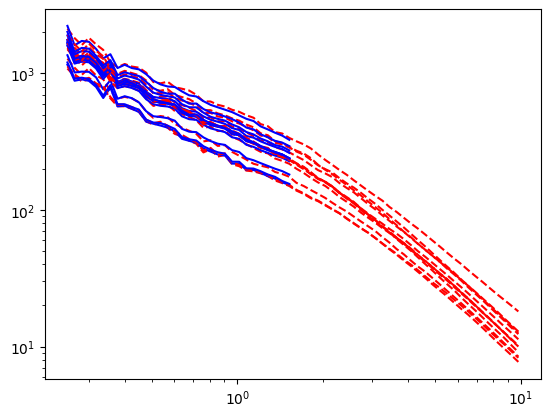

In [10]:
# Plot results
# plt.scatter(x, y, label="True Data")
# load k values

# plot in log-log scale
plt.figure()

# loop over all the test data
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_test[i], color="red", linestyle="--", label="True Data") 
    # plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
    plt.loglog(k_1, y_l1_pred[i], color="blue", label="NN L1 Prediction")
# plt.legend()
plt.show()

In [11]:
k.max()

np.float64(9.825361078106937)

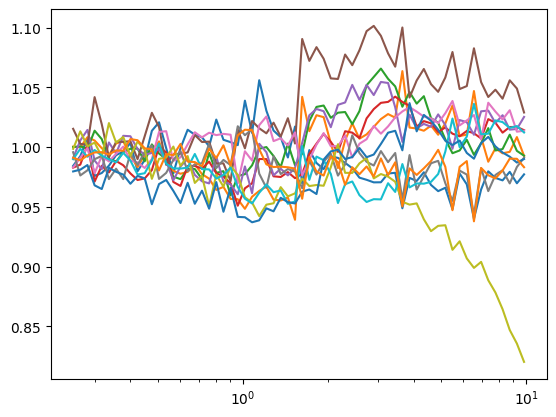

In [12]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    plt.semilogx(k, y_h_pred[i] / y_test[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [13]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred - y_test) / y_test)
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.0230021356479292


In [14]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred[:,:32] - y_test[:,:32]) / y_test[:,:32])
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.017777752053923675


In [15]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred[:,32:] - y_test[:,32:]) / y_test[:,32:])
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.028226519241934728


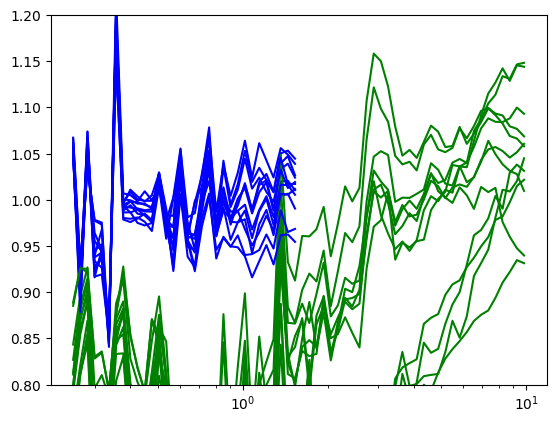

In [16]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    # plt.semilogx(k, y_h_pred[i] / y_test[i])
    plt.semilogx(k_1, y_l1_pred[i] / y_test[i][:32], color="blue")
    plt.semilogx(k_2, y_l2_pred[i] / y_test[i], color="green")
# limit the y-axis
plt.ylim(0.8, 1.2)
plt.show()

In [17]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_h_pred) - np.log10(y_test))**2)
print("Mean Square Error:", mse)

Mean Square Error: 0.0001902052346860948


In [18]:
# load HF training data
x_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_input_fidelity_1.txt")
y_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_output_fidelity_1.txt")
y_th = 10**y_th

In [19]:
# compare the prediction with the training data
_, y_th_pred = emu.predict(x_th)

output lg: True
output lg: True
output lg: True
output lg: True
x_xLABlin [[0.274697   0.04519192 0.6994276  ... 1.17609358 1.11751652 1.06819272]
 [0.2974242  0.04894949 0.6681145  ... 1.05025911 0.99618596 0.94165641]
 [0.3468182  0.04907071 0.7176094  ... 1.18684411 1.13528192 1.0851264 ]
 ...
 [0.2640909  0.04610101 0.7081818  ... 1.02060103 0.97241163 0.92518127]
 [0.3065152  0.0499798  0.6906734  ... 1.178478   1.124228   1.07395232]
 [0.3225758  0.04749495 0.6634007  ... 1.12942147 1.07572174 1.02276015]]
[ 2.74697000e-01  4.51919200e-02  6.99427600e-01  2.48518500e-09
  9.75673400e-01 -1.06666700e+00 -3.40909100e-01  1.26515200e-01
  2.66532000e+00 -2.16161600e-02  3.31738973e+00  3.17435455e+00
  3.19964933e+00  3.20048141e+00  3.15120888e+00  3.06680775e+00
  3.10627079e+00  2.99584746e+00  3.02432513e+00  3.00445771e+00
  2.98608065e+00  2.94732761e+00  2.89730000e+00  2.86723542e+00
  2.85501170e+00  2.85026598e+00  2.81417799e+00  2.78356171e+00
  2.78107548e+00  2.7377677

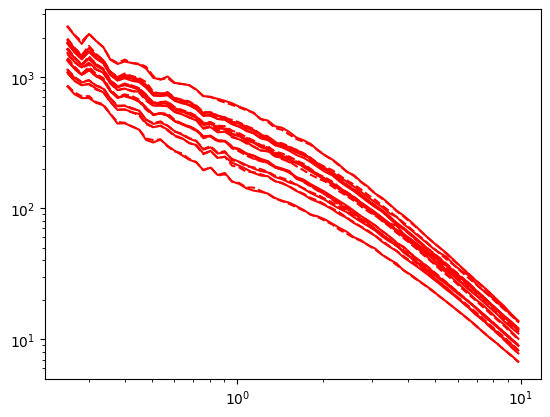

In [20]:


# plot in log-log scale
plt.figure()

# loop over all the test data 
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_th[i], color="red", linestyle="--", label="True Data") 
    plt.loglog(k, y_th_pred[i], color="red", label="NN Prediction")
# plt.legend()
plt.show()


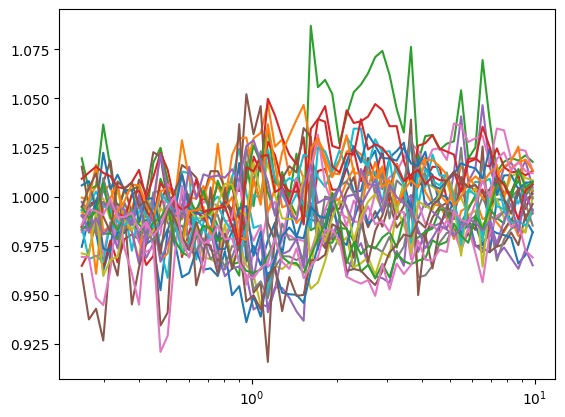

In [21]:
# plot ratio
plt.figure()

for i in range(y_th_pred.shape[0]):
    plt.semilogx(k, y_th_pred[i] / y_th[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [22]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_th_pred) - np.log10(y_th))**2)
print("Mean Square Error:", mse)

Mean Square Error: 9.199560080677766e-05
